# Lec 21 - Step Functions
## CMSE 381 - Fall 2022
## Nov 7, 2022



We're going to try again with the step functions.

In [1]:
# Everyone's favorite standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time


# ML imports we've used previously
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm


# 0. Loading in the data

We're going to use the `Wage` data used in the book, so note that many of your plots can be checked by looking at figures in the book.

In [2]:
df = pd.read_csv('Wage.csv', index_col =0 )
df.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 231655 to 453557
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   sex         3000 non-null   object 
 3   maritl      3000 non-null   object 
 4   race        3000 non-null   object 
 5   education   3000 non-null   object 
 6   region      3000 non-null   object 
 7   jobclass    3000 non-null   object 
 8   health      3000 non-null   object 
 9   health_ins  3000 non-null   object 
 10  logwage     3000 non-null   float64
 11  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 304.7+ KB


In [4]:
df.describe()

,year,age,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2005.791000,42.414667,4.653905,111.703608
std,2.026167,11.542406,0.351753,41.728595
min,2003.000000,18.000000,3.000000,20.085537
25%,2004.000000,33.750000,4.447158,85.383940
50%,2006.000000,42.000000,4.653213,104.921507
75%,2008.000000,51.000000,4.857332,128.680488
max,2009.000000,80.000000,5.763128,318.342430


Here's the plot we used multiple times in class to look at a single variable:  `age` vs `wage`

Text(0, 0.5, 'Wage')

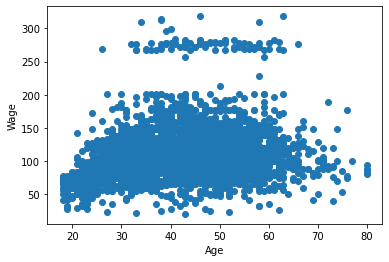

In [5]:
plt.scatter(df.age,df.wage)
plt.xlabel('Age')
plt.ylabel('Wage')

# 2. Step functions

Now let's try to use step functions to learn a model using `age` to predict `wage`. Like with the polynomial example from last time, all we're going to do is build a data frame or feature matrix that has the step function values in each column, and then pass that matrix to our favorite linear modeling function. 

First, we want to get a dataframe with the cuts. 

In [6]:
df_cut, bins = pd.cut(df.age, 4, retbins = True, right = False)

I will define the entries in the bins to be the $c_i$'s as follows. 


In [7]:
print(bins)

[18.    33.5   49.    64.5   80.062]


In [8]:
print(r'c_1 = ', bins[0])
print(r'c_2 = ', bins[1])
print(r'c_3 = ', bins[2])
print(r'c_4 = ', bins[3])
print(r'c_5 = ', bins[4])

c_1 =  18.0
c_2 =  33.5
c_3 =  49.0
c_4 =  64.5
c_5 =  80.062


&#9989; **<font color=red>Do this:</font>**
 For each of the functions $C_0(X)$, $C_1(X)$, $C_2(X)$, $C_3(X)$, $C_4(X)$, $C_5(X)$ (following our notation in class), determine the domains where they have value 1. 

*Your answer here*

- $C_0(X)$: X in (-inf,18)
- $C_1(X)$: X in [18,33.5)
- $C_2(X)$: X in [33.5,49)
- $C_3(X)$: X in [49,64.5)
- $C_4(X)$: X in [64.5, 80.062)
- $C_5(X)$: X in [80.062, inf)

Below is my code that generates the data frame storing $C_i(X)$ for all our entries. 

In [42]:
df_steps_dummies = pd.get_dummies(df_cut)
df_steps_dummies = df_steps_dummies.iloc[:, 0:3]
df_steps_dummies.head()

,"[18.0, 33.5)","[33.5, 49.0)","[49.0, 64.5)"
231655,1,0,0
86582,1,0,0
161300,0,1,0
155159,0,1,0
11443,0,0,1


&#9989; **<font color=red>Q:</font>** Which of the functions $C_i(X)$ for $i=0,\cdots, 5$ have columns represented in this matrix? *Note: it's not all of them*


* 1,2,3,4, which is none of the ones containing infinity

$$
f(x) = \beta_0 + \beta_1 * C_1(x) + \beta_2 * C_2(x) + \beta_3 * C_3(x)
$$

&#9989; **<font color=red>Do this:</font>** Pass this matrix to a linear regression model and use it to predict `wage`. What is the equation for your learned model? Be specific in terms of the $C_i$ functions you learned earlier.

In [43]:
# Your code here #
X = df_steps_dummies
y = df.wage

linreg = LinearRegression()
linreg.fit(X,y)

print(linreg.coef_)
print(linreg.intercept_)

[-7.6405917  16.29255783 16.24514046]
101.79898373236946


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Interval']. An error will be raised in 1.2.
  warnings.warn(


&#9989; **<font color=red>Do this:</font>** Using the function $f(X)$ you just learned, what is the function value on each of the following values of $X$?

| X  | f(X)| 
| ---| --- | 
| 10 |   101.8  |
| 20 |   101.8 - 7.6 =  94.2 |
| 30 |   101.8 - 7.6 =  94.2  | 
| 40 |     |
| 50 |     | 
| 60 |     | 
| 70 |     |
| 80 |     |



Assuming you stored your linear regression model as `linreg`, the following code will plot the learned function. Check that the answers you got in the table above match with what you're seeing in the graph.  

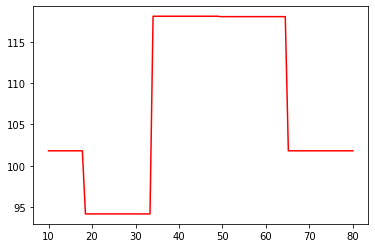

In [50]:
t = np.linspace(10,80,100)

bin_mapping = np.digitize(t, bins)

# print(bin_mapping)
t_dummies = pd.get_dummies(bin_mapping)
t_dummies = t_dummies.drop(columns =[0,4])

stepPredict = linreg.predict(t_dummies) #<---- If you named your linear regression 
                                        #      something else, you can fix this to match.
            
#--------Uncomment below to draw the scatter plot of the data as well-------#
# plt.scatter(df.age,df.wage,marker = '+')
# plt.xlabel('Age')
# plt.ylabel('Wage')

plt.plot(t,stepPredict,color='red')


![Stop Icon](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Vienna_Convention_road_sign_B2a.svg/180px-Vienna_Convention_road_sign_B2a.svg.png)

Great, you got to here! Hang out for a bit, there's more lecture before we go on to the next portion. 

# 3.  Classification version 

Now we can try out the classification version of the problem. Let's build the classifier that predicts whether a person of a given age will make more than $250,000. You already made the matrix of step function features, so we just have to hand it to `LogisticRegression` to do its thing.

Text(0, 0.5, 'Wage')

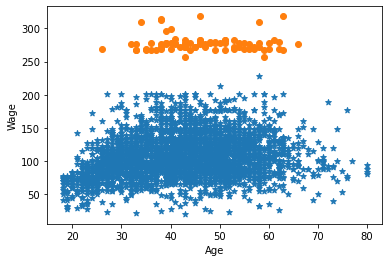

In [51]:

plt.scatter(df.age[df.wage <=250], df.wage[df.wage<=250],marker = '*')
plt.scatter(df.age[df.wage >250], df.wage[df.wage>250])

plt.xlabel('Age')
plt.ylabel('Wage')

# plt.savefig('WageColoredBy250.png', bbox_inches = 'tight')


In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
y = np.array(df.wage>250) #<--- this makes sure I 
                          #     just have true/false input
clf = LogisticRegression(random_state=48824)
clf.fit(df_steps_dummies,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Interval']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression(random_state=48824)

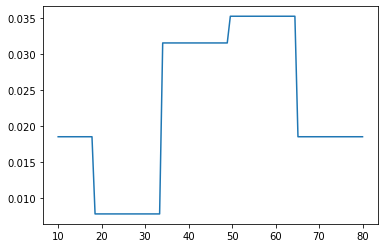

In [54]:
f = clf.predict_proba(t_dummies)
plt.plot(t,f[:,1])



-----
### Congratulations, we're done!
Written by Dr. Liz Munch, Michigan State University

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.